## Task-C: Regression outlier effect.

<font face='georgia'> <h3> Objective:Visualization best fit linear regression line for different scenarios</h3> </font>

In [1]:
# you should not import any other packages
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.linear_model import SGDRegressor

In [2]:
import numpy as np
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

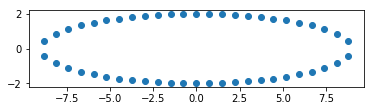

In [3]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [4]:
X= b * np.sin(phi)
Y= a * np.cos(phi)

In [5]:
def draw_line(coef,intercept, mi, ma):
    #y=mx+c here c is intercept and slope(m) is coeff
    # to draw the hyper plane we are creating two points
    #1.(min,coeff*min+intercept) here min is minimum of x
    #2.(max,coeff*max+intercept) here max is maximum of x
    points=np.array([[mi,(coef*mi+intercept)],[ma,(coef*ma+intercept)]])
    plt.plot(points[:,0], points[:,1])

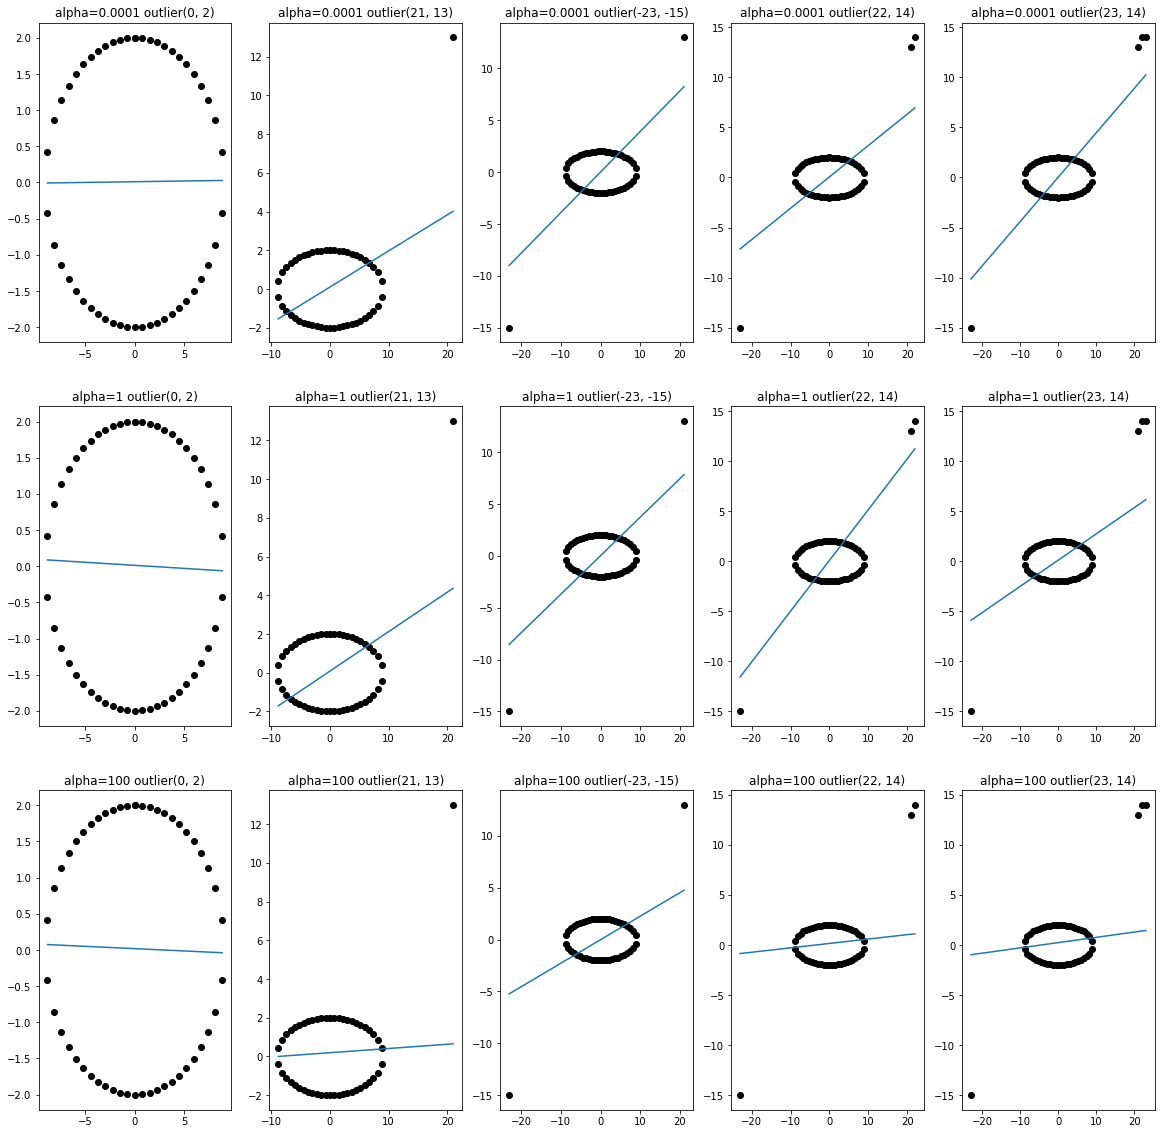

In [6]:
outliers=[(0,2),(21, 13),(-23, -15),(22,14), (23,14)]
alpha=[0.0001,1,100]
plt.figure(figsize=(20,20))
grid=1
for i in range(3):
    X= b * np.sin(phi)
    Y= a * np.cos(phi)
    for j in outliers:
        X=np.append(X,j[0]).reshape(-1,1)
        Y=np.append(Y,j[1]).reshape(-1,1)
        plt.subplot(3,5,grid)
        grid+=1
        clf=SGDRegressor(alpha=alpha[i],loss='squared_loss',eta0=0.001,learning_rate='constant')
        clf.fit(X,Y)
        coeff=clf.coef_
        intercept=clf.intercept_
        mi=np.min(X)
        ma=np.max(X)
        plt.scatter(X,Y,color='black')
        draw_line(coeff[0],intercept,mi,ma)
        plt.title('alpha='+str(alpha[i])+' outlier'+str(j))     
plt.show()

<h2>Observations</h2><br>
1.when first (0,2) outlier is added ,<br>
as alpha increases, the hyper plane postion changes slightly.<br>
so,hyper plane postion is slightly impacted by outlier.<br><br>
2.when second (21,13) outlier is added ,<br>
when alpha=0.0001 and 1, there is change in  hyper plane position.hyper plane  moves towards the outliers <br>
when alpha=100,hyper plane position moves away from outliers and its postion is almost return to normal.<br>
so,when alpha=100 hyper plane postion is not much impacted by outlier.<br><br>
3.when third (-23,-15) outlier is added ,<br>
when alpha=0.0001 and 1, there is change in  hyper plane position.hyper plane  moves towards the outliers <br>
when alpha=100 hyper plane postion slightly move away from ouliers.<br>
hyper plane postion is largely impacted by the outliers<br><br>
4.when fourth (22,14) outlier is added ,<br>
when alpha=0.0001 and 1, there is change in  hyper plane position.hyper plane  moves towards the outliers<br>
when alpha=100,hyper plane position moves away from outliers and its postion is some near to normal.<br><br>
5.when fifth (23,14) outlier is added ,<br>
when alpha=0.0001, there is change in  hyper plane position.hyper plane  moves towards the outliers<br>
when alpha=1 hyper plane postion slightly move away from ouliers.<br>
when alpha=100,hyper plane position moves away from outliers and its postion is some near to normal.<br>